## Gender analysis

In [ ]:
! git clone https://github.com/AndruKP/mathprofi-education
! pip install dash

Cloning into 'mathprofi-education'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 148 (delta 72), reused 111 (delta 43), pack-reused 0
Receiving objects: 100% (148/148), 24.36 MiB | 5.03 MiB/s, done.
Resolving deltas: 100% (72/72), done.
Updating files: 100% (29/29), done.


In [ ]:
data_folder = '../data'

In [22]:
%cd mathprofi-education/

[Errno 2] No such file or directory: 'mathprofi-education/'
/content/mathprofi-education


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

from preprocessing import rename_columns, replace_with_nan

In [24]:
employed_by_sex_districts = replace_with_nan(rename_columns(pd.read_csv(f'{data_folder}/RV_O_047_L_OK_SK.CSV', delimiter=';')))
employed_by_sex_regions = replace_with_nan(rename_columns(pd.read_csv(f'{data_folder}/RV_O_047_R_KR_SK.CSV', delimiter=';')))
employed_by_sex_economical_regions = replace_with_nan(rename_columns(pd.read_csv(f'{data_folder}/RV_O_047_R_OL_SK.CSV', delimiter=';')))
employed_by_sex_slovakia = replace_with_nan(rename_columns(pd.read_csv(f'{data_folder}/RV_O_047_R_SR_SK.CSV', delimiter=';')))

population_by_sex_slovakia = replace_with_nan(rename_columns(pd.read_csv(f'{data_folder}/RV_O_010_R_SR_SK.CSV', delimiter=';')))


In [25]:
employed_by_sex_districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346464 entries, 0 to 346463
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   LAU1_CODE          346464 non-null  object
 1   district_name      346464 non-null  object
 2   sex                346464 non-null  object
 3   year_5_age_groups  346464 non-null  object
 4   education          335993 non-null  object
 5   ISCO_occupation    318633 non-null  object
 6   count              346464 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 18.5+ MB


In [26]:
employee_by_age = employed_by_sex_slovakia.groupby('year_5_age_groups')['count'].sum()

In [27]:
sex_sk = population_by_sex_slovakia[population_by_sex_slovakia['economical age groups'] != 'predproduktívny vek (0-14 rokov)'].groupby(
    'sex')['count'].sum()

sex_emplyee_sk = employed_by_sex_slovakia.groupby('sex')['count'].sum()

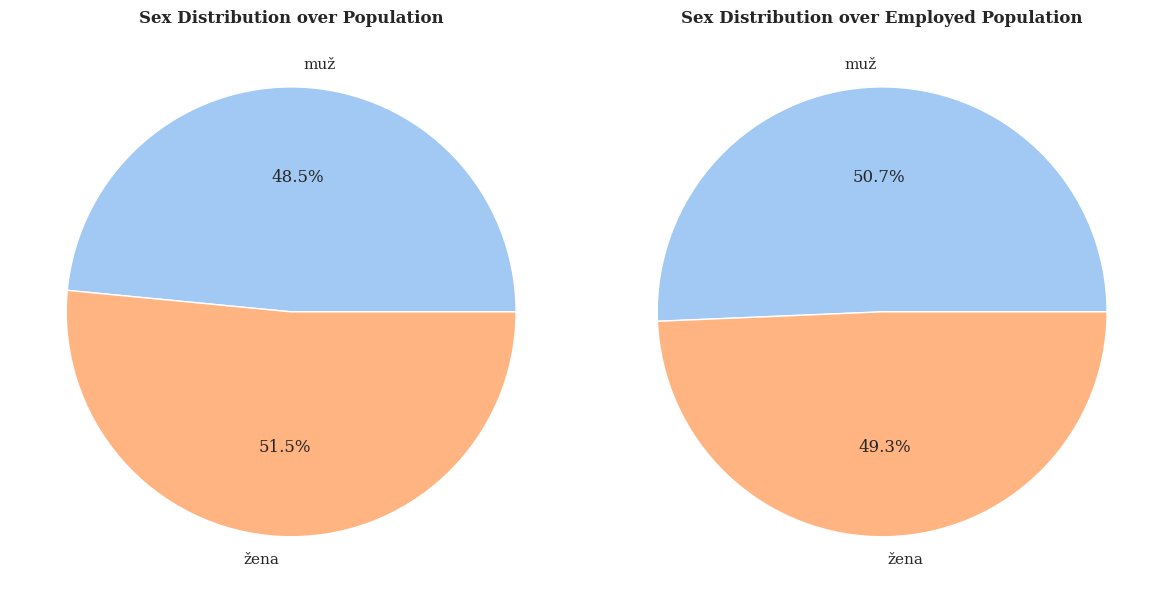

In [28]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.rcParams['font.family'] = 'serif'
colors = sns.color_palette('pastel')[:2]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(x=sex_sk.values, labels=sex_sk.index, autopct='%1.1f%%', colors=colors)
axes[0].set_title('Sex Distribution over Population', fontweight='bold')

axes[1].pie(x=sex_emplyee_sk.values, labels=sex_emplyee_sk.index, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Sex Distribution over Employed Population', fontweight='bold')

plt.tight_layout()
plt.show()

In [58]:
table = employed_by_sex_slovakia.groupby(['sex', 'education'])['count'].sum()
df = table.reset_index()
df

sex                                          education   count
0    muž  bez školského vzdelania – osoby vo veku 15 rok...    1027
1    muž  stredné odborné (učňovské) vzdelanie bez matur...     866
2    muž  stredné odborné (učňovské) vzdelanie bez matur...   17175
3    muž  stredné odborné (učňovské) vzdelanie bez matur...   31598
4    muž  stredné odborné (učňovské) vzdelanie bez matur...  238599
5    muž        vysokoškolské vzdelanie (bližšie neuvedené)      89
6    muž          vysokoškolské vzdelanie - 1. stupeň (Bc.)   30651
7    muž  vysokoškolské vzdelanie - 2. stupeň (Ing.; Mgr...  238265
8    muž   vysokoškolské vzdelanie - 3. stupeň (PhD.; a i.)   20797
9    muž       vyššie odborné vzdelanie (bližšie neuvedené)       1
10   muž  vyššie odborné vzdelanie nadstavbové (maturita...   62300
11   muž  vyššie odborné vzdelanie pomaturitné (pomaturi...    6876
12   muž  vyššie odborné vzdelanie vyššie odborné (absol...    7060
13   muž             základné vzdelanie (bližšie neuvedené)      88
14   muž     základné vzdelanie - 1. stupeň základnej školy    9688
15   muž     základné vzdelanie - 2. stupeň základnej školy   44105
16   muž  úplné stredné vzdelanie s maturitou (bližšie n...     353
17   muž        úplné stredné vzdelanie s maturitou odborné  203315
18   muž  úplné stredné vzdelanie s maturitou odborné (u...  115013
19   muž      úplné stredné vzdelanie s maturitou všeobecné   48197
20  žena  bez školského vzdelania – osoby vo veku 15 rok...     485
21  žena  stredné odborné (učňovské) vzdelanie bez matur...      69
22  žena  stredné odborné (učňovské) vzdelanie bez matur...   12979
23  žena  stredné odborné (učňovské) vzdelanie bez matur...   23146
24  žena  stredné odborné (učňovské) vzdelanie bez matur...  145920
25  žena        vysokoškolské vzdelanie (bližšie neuvedené)      57
26  žena          vysokoškolské vzdelanie - 1. stupeň (Bc.)   51095
27  žena  vysokoškolské vzdelanie - 2. stupeň (Ing.; Mgr...  318984
28  žena   vysokoškolské vzdelanie - 3. stupeň (PhD.; a i.)   19824
29  žena       vyššie odborné vzdelanie (bližšie neuvedené)       1
30  žena  vyššie odborné vzdelanie nadstavbové (maturita...   52055
31  žena  vyššie odborné vzdelanie pomaturitné (pomaturi...   16786
32  žena  vyššie odborné vzdelanie vyššie odborné (absol...   14392
33  žena             základné vzdelanie (bližšie neuvedené)      47
34  žena     základné vzdelanie - 1. stupeň základnej školy    7032
35  žena     základné vzdelanie - 2. stupeň základnej školy   41097
36  žena  úplné stredné vzdelanie s maturitou (bližšie n...     339
37  žena        úplné stredné vzdelanie s maturitou odborné  226169
38  žena  úplné stredné vzdelanie s maturitou odborné (u...   60936
39  žena      úplné stredné vzdelanie s maturitou všeobecné   68443

In [55]:
table = employed_by_sex_slovakia.groupby(['sex', 'education'])['count'].sum()
df = table.reset_index()
df.columns = ['Sex', 'education', 'Count']

male_data = df[df['Sex'] == 'muž']
female_data = df[df['Sex'] == 'žena']

male_data = df[df['Sex'] == 'muž']
female_data = df[df['Sex'] == 'žena']

combined_data = pd.concat([male_data, female_data])

combined_data = combined_data.sort_values(by=['education', 'Sex'])

fig = px.bar(combined_data,
             x='Count',
             y='education',
             color='Sex',
             orientation='h',
             barmode='group',
             title='Count of Work Occupation by Gender',
             labels={'Count': 'Count', 'education': 'education', 'Sex': 'Gender'},
             color_discrete_map={'muž': 'blue', 'žena': 'pink'})

fig.update_traces(marker=dict(line=dict(width=1, color='grey')))

fig.update_yaxes(categoryorder='total ascending')

fig.update_layout(showlegend=True, legend_title_text='Gender', width=1300, height=1000)


fig.show()

In [30]:
table = employed_by_sex_slovakia.groupby(['sex', 'ISCO_occupation'])['count'].sum()
df = table.reset_index()
df.columns = ['Sex', 'ISCO_occupation', 'Count']

male_data = df[df['Sex'] == 'muž']
female_data = df[df['Sex'] == 'žena']

male_data = df[df['Sex'] == 'muž']
female_data = df[df['Sex'] == 'žena']

combined_data = pd.concat([male_data, female_data])

combined_data = combined_data.sort_values(by=['ISCO_occupation', 'Sex'])

fig = px.bar(combined_data,
             x='Count',
             y='ISCO_occupation',
             color='Sex',
             orientation='h',
             barmode='group',
             title='Count of Work Occupation by Gender',
             labels={'Count': 'Count', 'ISCO_occupation': 'ISCO_occupation', 'Sex': 'Gender'},
             color_discrete_map={'muž': 'blue', 'žena': 'pink'})

fig.update_traces(marker=dict(line=dict(width=1, color='grey')))

fig.update_yaxes(categoryorder='total ascending')

fig.update_layout(showlegend=True, legend_title_text='Gender', width=1200, height=1000)


fig.show()

In [64]:
employed_by_sex_slovakia

NUTS1_CODE           state_name   sex year_5_age_groups  \
0            SK0  Slovenská republika   muž     15 - 19 rokov   
1            SK0  Slovenská republika   muž     15 - 19 rokov   
2            SK0  Slovenská republika   muž     15 - 19 rokov   
3            SK0  Slovenská republika   muž     15 - 19 rokov   
4            SK0  Slovenská republika   muž     15 - 19 rokov   
...          ...                  ...   ...               ...   
13526        SK0  Slovenská republika  žena     90 - 94 rokov   
13527        SK0  Slovenská republika  žena     90 - 94 rokov   
13528        SK0  Slovenská republika  žena     95 - 99 rokov   
13529        SK0  Slovenská republika  žena     95 - 99 rokov   
13530        SK0  Slovenská republika  žena     95 - 99 rokov   

                                               education  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
13526  vysokoškolské vzdelanie - 2. stupeň (Ing.; Mgr...   
13527   vysokoškolské vzdelanie - 3. stupeň (PhD.; a i.)   
13528     základné vzdelanie - 2. stupeň základnej školy   
13529        úplné stredné vzdelanie s maturitou odborné   
13530  vysokoškolské vzdelanie - 2. stupeň (Ing.; Mgr...   

                                         ISCO_occupation  count  
0                                                    NaN    354  
1                     Odborní pracovníci v zdravotníctve      1  
2      Administratívni pracovníci na záznam číselných...      1  
3                         Pracovníci v osobných službách      1  
4                                              Predavači      1  
...                                                  ...    ...  
13526                        Špecialisti v zdravotníctve      1  
13527                                                NaN      2  
13528                                                NaN      1  
13529                                                NaN      1  
13530                                                NaN      1  

[13531 rows x 7 columns]

In [75]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

app = dash.Dash(__name__)

education_options = [{'label': edu, 'value': edu} for edu in employed_by_sex_slovakia['education'].unique() if edu][1:]
age_group_options = [{'label': age_group, 'value': age_group} for age_group in employed_by_sex_slovakia['year_5_age_groups'].unique() if age_group]
gender_options = [{'label': gender, 'value': gender} for gender in employed_by_sex_slovakia['sex'].unique() if gender]

app.layout = html.Div([
    html.H1("Education Distribution by Age and Gender"),
    html.Label("Select Education"),
    dcc.Dropdown(
        id='education-dropdown',
        options=education_options,
        value=education_options[0]['value'] if education_options else None
    ),
    html.Label("Select Age Group"),
    dcc.Dropdown(
        id='age-group-dropdown',
        options=age_group_options,
        value=age_group_options[0]['value'] if age_group_options else None,
        multi=True
    ),
    html.Label("Select Gender"),
    dcc.Dropdown(
        id='gender-dropdown',
        options=gender_options,
        value=gender_options[0]['value'] if gender_options else None
    ),
    dcc.Graph(id='education-distribution-plot')
])

@app.callback(
    Output('education-distribution-plot', 'figure'),
    [Input('education-dropdown', 'value'),
     Input('age-group-dropdown', 'value'),
     Input('gender-dropdown', 'value')]
)
def update_plot(selected_education, selected_age_groups, selected_gender):
    filtered_data = employed_by_sex_slovakia

    if selected_gender:
        filtered_data = filtered_data[filtered_data['sex'] == selected_gender]
    if selected_education:
        filtered_data = filtered_data[filtered_data['education'] == selected_education]
    if selected_age_groups:
        filtered_data = filtered_data[filtered_data['year_5_age_groups'].isin(selected_age_groups)]

    print(filtered_data)

    grouped_data = filtered_data.groupby(['education', 'sex', 'year_5_age_groups'])['count'].sum().reset_index()

    fig = px.bar(grouped_data, x='year_5_age_groups', y='count', color='sex', barmode='group',
                 title=f"Education Distribution by Age and Gender - Education: {selected_education}",
                 labels={'count': 'Total Count'})
    return fig

# Run the app on port 8050
if __name__ == '__main__':
    app.run_server(debug=True, port=8049)


<IPython.core.display.Javascript object>

## Unemployment exploration

In [31]:
nan_age_groups = employed_by_sex_slovakia[employed_by_sex_slovakia['ISCO_occupation'].isna()]

unemployed_table = nan_age_groups.groupby('year_5_age_groups').agg({
    'ISCO_occupation': lambda x: x.isna().sum(),
    'count': 'sum'
})
unemployed_table = unemployed_table.rename(columns={'ISCO_occupation': 'NaN count', 'count': 'Total count'})

unemployed_table = unemployed_table.reset_index()
unemployed_table

year_5_age_groups  NaN count  Total count
0      15 - 19 rokov         32         2836
1      20 - 24 rokov         38        18453
2      25 - 29 rokov         40        23609
3      30 - 34 rokov         40        27197
4      35 - 39 rokov         40        27485
5      40 - 44 rokov         38        26692
6      45 - 49 rokov         39        23485
7      50 - 54 rokov         39        19515
8      55 - 59 rokov         38        19769
9      60 - 64 rokov         37        43127
10     65 - 69 rokov         37        36471
11     70 - 74 rokov         35        17366
12     75 - 79 rokov         33         5924
13     80 - 84 rokov         33         1845
14     85 - 89 rokov         28          422
15     90 - 94 rokov         20           47
16     95 - 99 rokov          4            5

In [32]:
not_nan_age_groups = employed_by_sex_slovakia[~employed_by_sex_slovakia['ISCO_occupation'].isna()]

employed_table = not_nan_age_groups.groupby('year_5_age_groups').agg({
    'ISCO_occupation': lambda x: (~x.isna()).sum(),
    'count': 'sum'
})
employed_table = employed_table.rename(columns={'ISCO_occupation': 'NaN count', 'count': 'Total count'})

employed_table = employed_table.reset_index()
employed_table

year_5_age_groups  NaN count  Total count
0      15 - 19 rokov        536         6019
1      20 - 24 rokov       1067        87845
2      25 - 29 rokov       1174       193486
3      30 - 34 rokov       1208       232062
4      35 - 39 rokov       1247       260438
5      40 - 44 rokov       1231       286862
6      45 - 49 rokov       1220       264232
7      50 - 54 rokov       1176       213606
8      55 - 59 rokov       1172       210625
9      60 - 64 rokov       1079       109425
10     65 - 69 rokov        847        22448
11     70 - 74 rokov        553         5679
12     75 - 79 rokov        285         1314
13     80 - 84 rokov        124          293
14     85 - 89 rokov         29           41
15     90 - 94 rokov         12           13

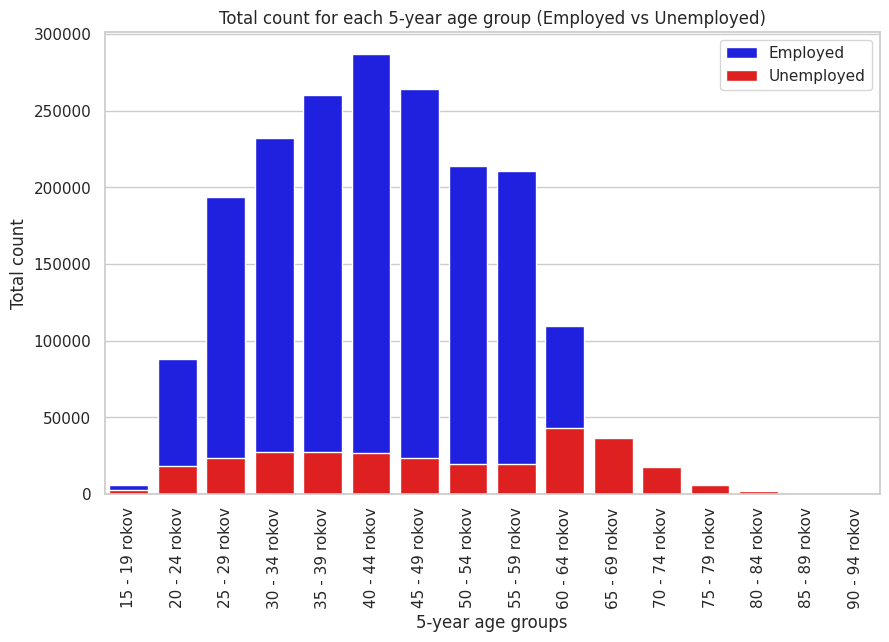

In [47]:
merged_table = pd.merge(employed_table, unemployed_table, on='year_5_age_groups', suffixes=('_employed', '_unemployed'))

sns.set_style("whitegrid")
sns.set_context("notebook")

plt.figure(figsize=(10, 6))

sns.barplot(x='year_5_age_groups', y='Total count_employed', data=merged_table, color='blue', label='Employed')
sns.barplot(x='year_5_age_groups', y='Total count_unemployed', data=merged_table, color='red', label='Unemployed')

plt.xticks(rotation='vertical')
plt.xlabel('5-year age groups')
plt.ylabel('Total count')
plt.title('Total count for each 5-year age group (Employed vs Unemployed)')
plt.savefig(f'Total count for each 5-year age group (Employed vs Unemployed).png')
plt.legend()

In [34]:
education_age_groups = nan_age_groups.copy()
education_age_groups['education'] = education_age_groups['education'].fillna('No education')

In [35]:
nan_age_groups_gender = education_age_groups.groupby('sex')['count'].sum().reset_index()

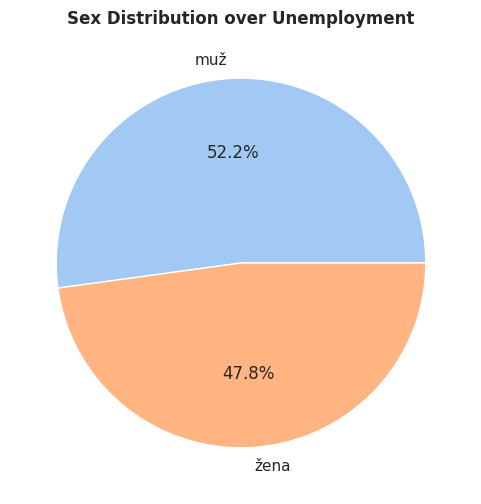

In [36]:
plt.figure(figsize=(6,6))
plt.pie(x=nan_age_groups_gender['count'], labels=nan_age_groups_gender['sex'], autopct='%1.1f%%', colors = colors)
plt.title('Sex Distribution over Unemployment', fontweight='bold')
plt.show()

In [37]:
education_unemployment = education_age_groups.groupby('education')['count'].sum()
education_unemployment = education_unemployment.sort_values(ascending=False)

In [38]:
education_age_groups

NUTS1_CODE           state_name   sex year_5_age_groups  \
0            SK0  Slovenská republika   muž     15 - 19 rokov   
8            SK0  Slovenská republika   muž     15 - 19 rokov   
9            SK0  Slovenská republika   muž     15 - 19 rokov   
30           SK0  Slovenská republika   muž     15 - 19 rokov   
64           SK0  Slovenská republika   muž     15 - 19 rokov   
...          ...                  ...   ...               ...   
13525        SK0  Slovenská republika  žena     90 - 94 rokov   
13527        SK0  Slovenská republika  žena     90 - 94 rokov   
13528        SK0  Slovenská republika  žena     95 - 99 rokov   
13529        SK0  Slovenská republika  žena     95 - 99 rokov   
13530        SK0  Slovenská republika  žena     95 - 99 rokov   

                                               education ISCO_occupation  \
0                                           No education             NaN   
8                 základné vzdelanie (bližšie neuvedené)             NaN   
9         základné vzdelanie - 1. stupeň základnej školy             NaN   
30        základné vzdelanie - 2. stupeň základnej školy             NaN   
64     stredné odborné (učňovské) vzdelanie bez matur...             NaN   
...                                                  ...             ...   
13525  vysokoškolské vzdelanie - 2. stupeň (Ing.; Mgr...             NaN   
13527   vysokoškolské vzdelanie - 3. stupeň (PhD.; a i.)             NaN   
13528     základné vzdelanie - 2. stupeň základnej školy             NaN   
13529        úplné stredné vzdelanie s maturitou odborné             NaN   
13530  vysokoškolské vzdelanie - 2. stupeň (Ing.; Mgr...             NaN   

       count  
0        354  
8          3  
9         91  
30       546  
64         6  
...      ...  
13525      2  
13527      2  
13528      1  
13529      1  
13530      1  

[571 rows x 7 columns]

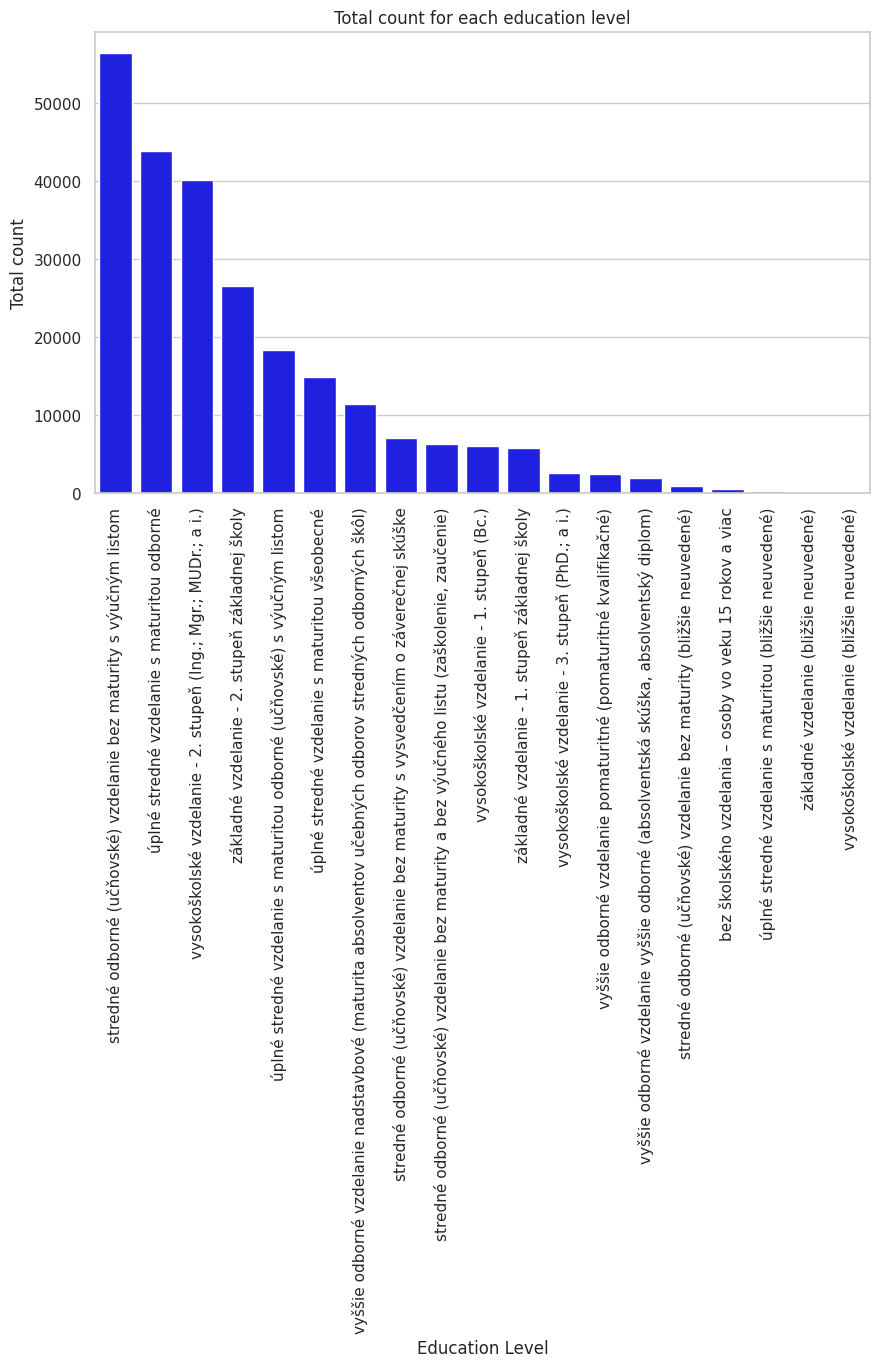

In [46]:
education_unemployment_witout_ne = education_unemployment[education_unemployment.index != 'No education']
plt.figure(figsize=(10, 6))

sns.barplot(x=education_unemployment_witout_ne.index, y=education_unemployment_witout_ne.values, color='blue')

plt.xlabel('Education Level')
plt.ylabel('Total count')
plt.title('Total count for each education level')

plt.xticks(rotation=90)
plt.savefig(f'Education_unemployment_total_without_no_education.png')
pass

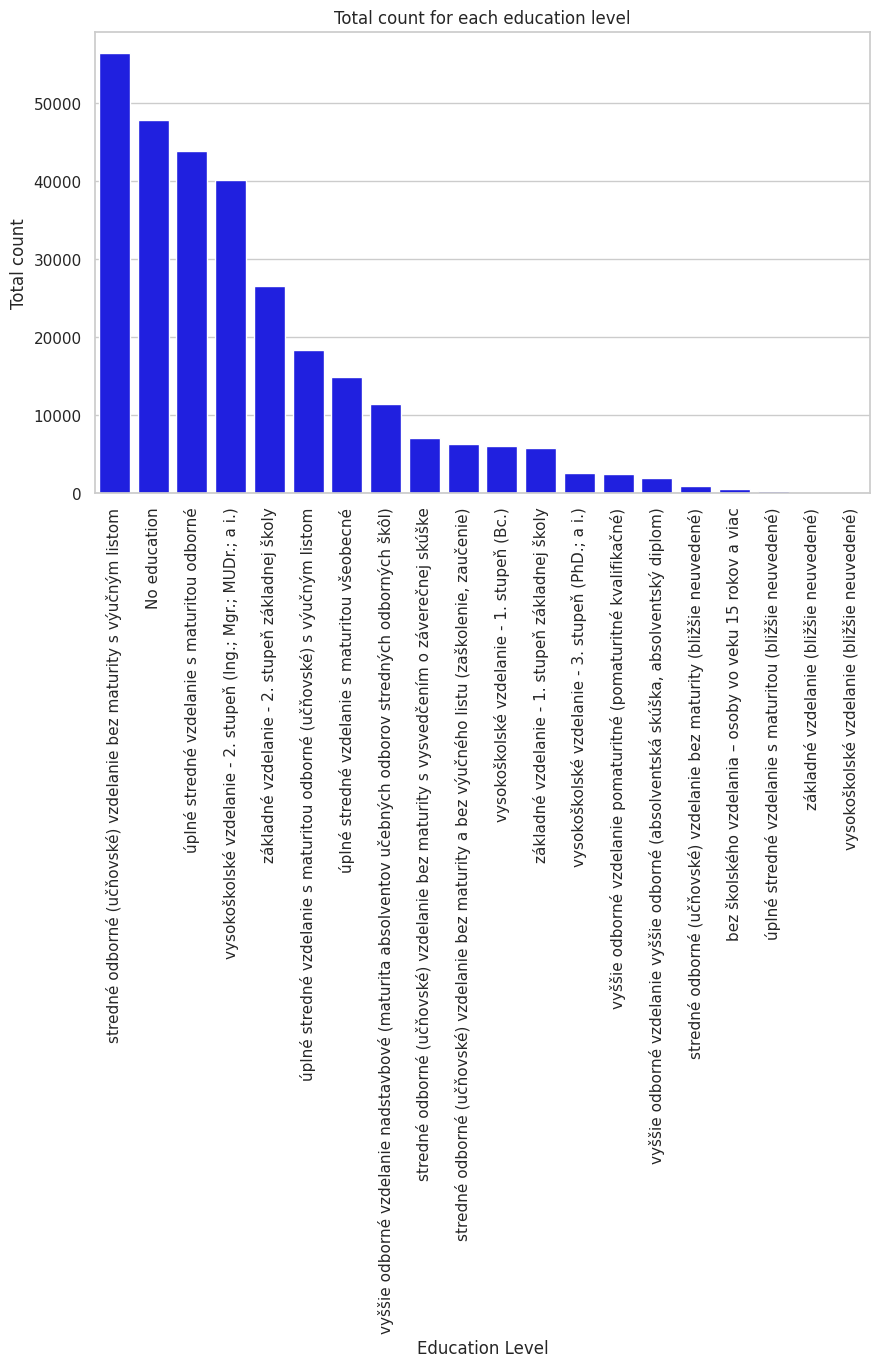

In [41]:
plt.figure(figsize=(10, 6))

sns.barplot(x=education_unemployment.index, y=education_unemployment.values, color='blue')

plt.xlabel('Education Level')
plt.ylabel('Total count')
plt.title('Total count for each education level')

plt.xticks(rotation=90)
plt.savefig(f'Education_unemployment_total_with_no_education.png')
pass

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



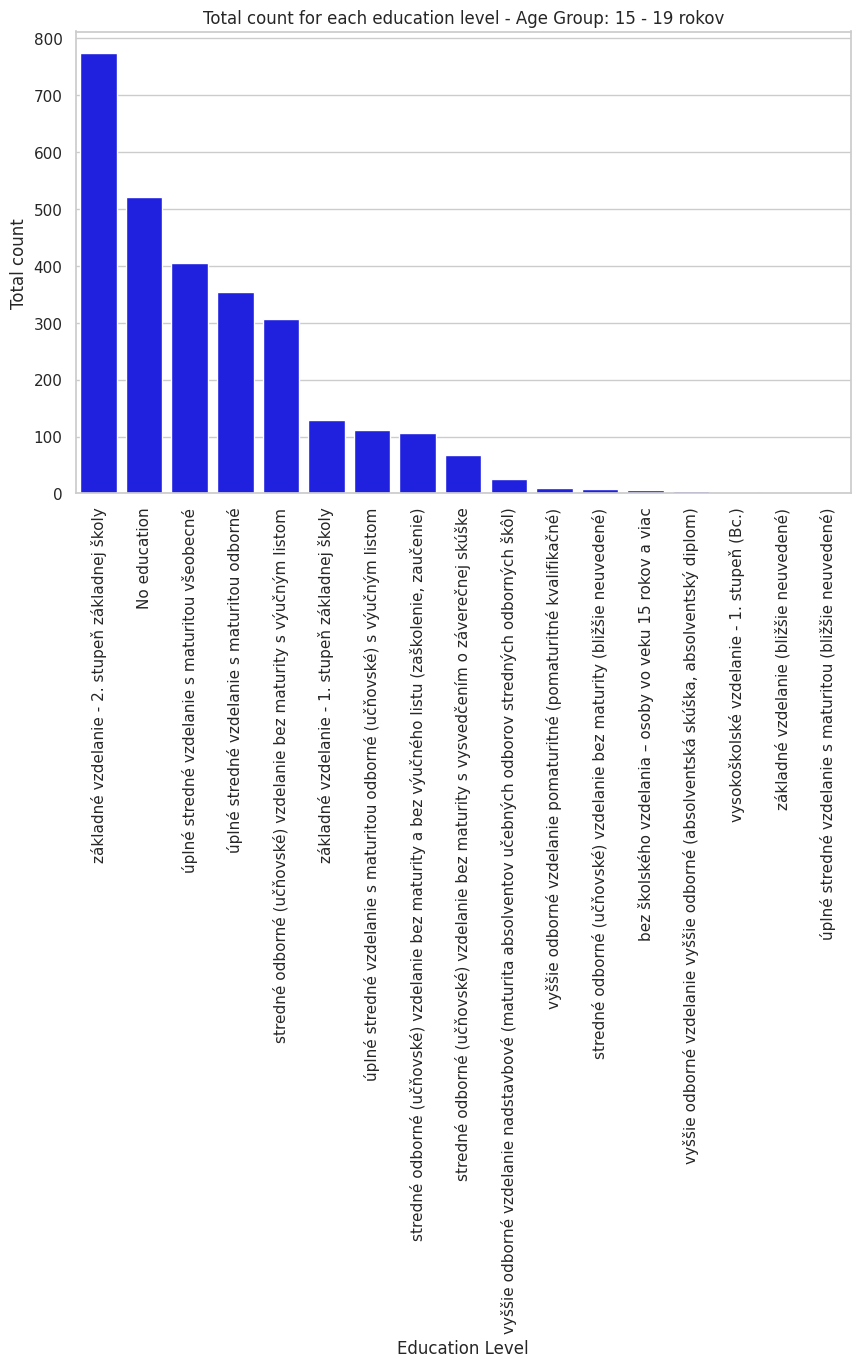

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



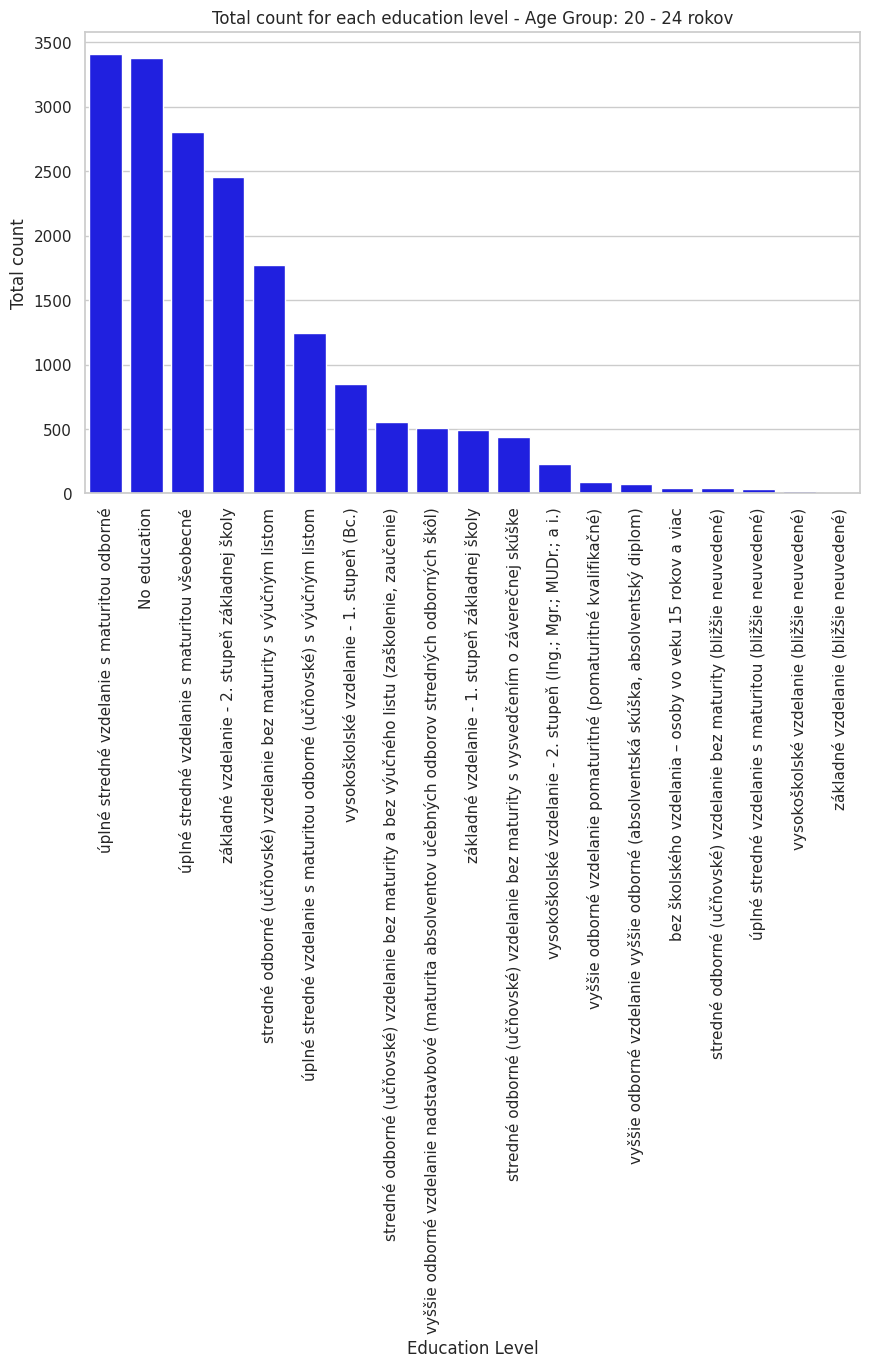

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



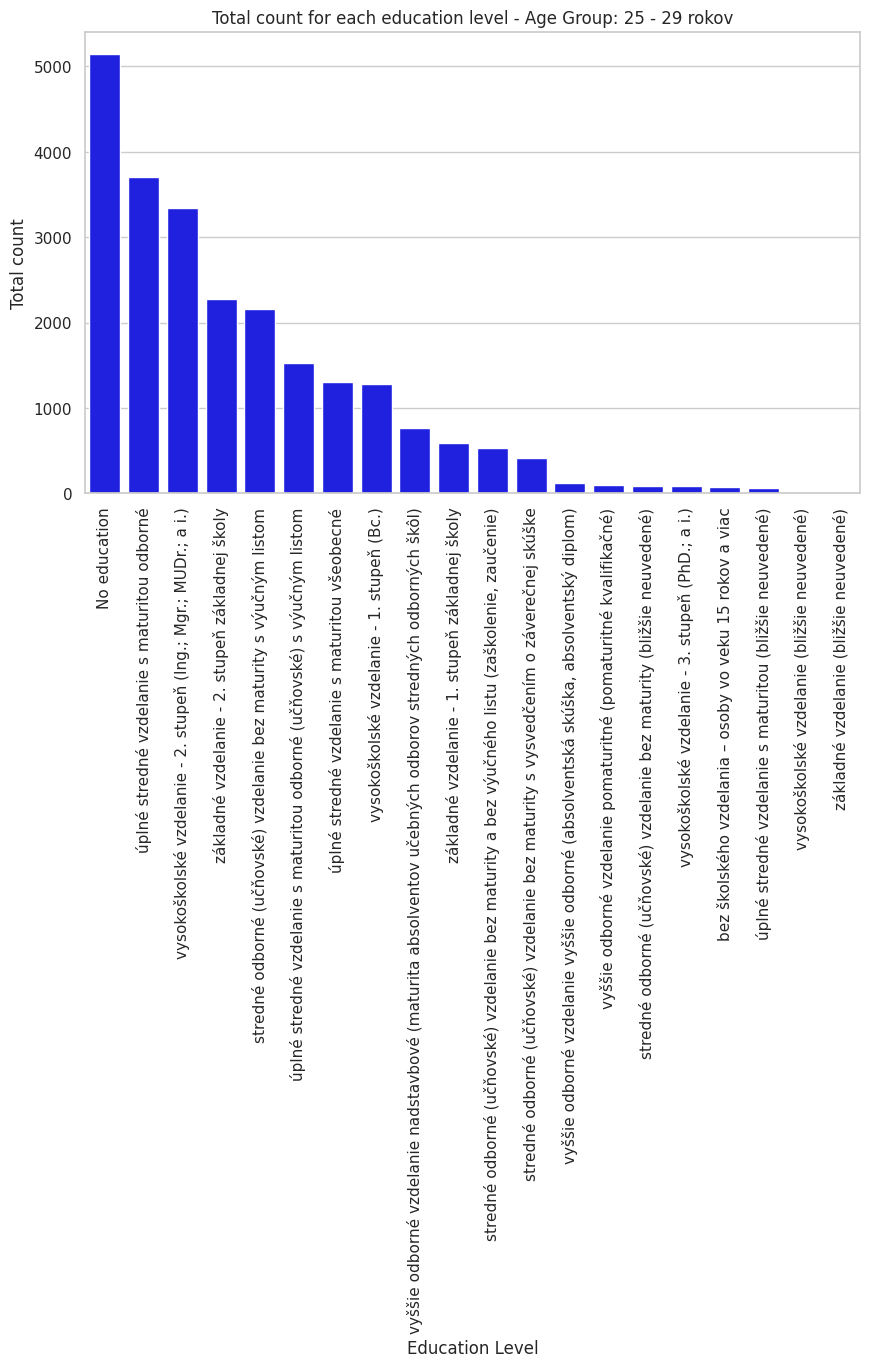

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



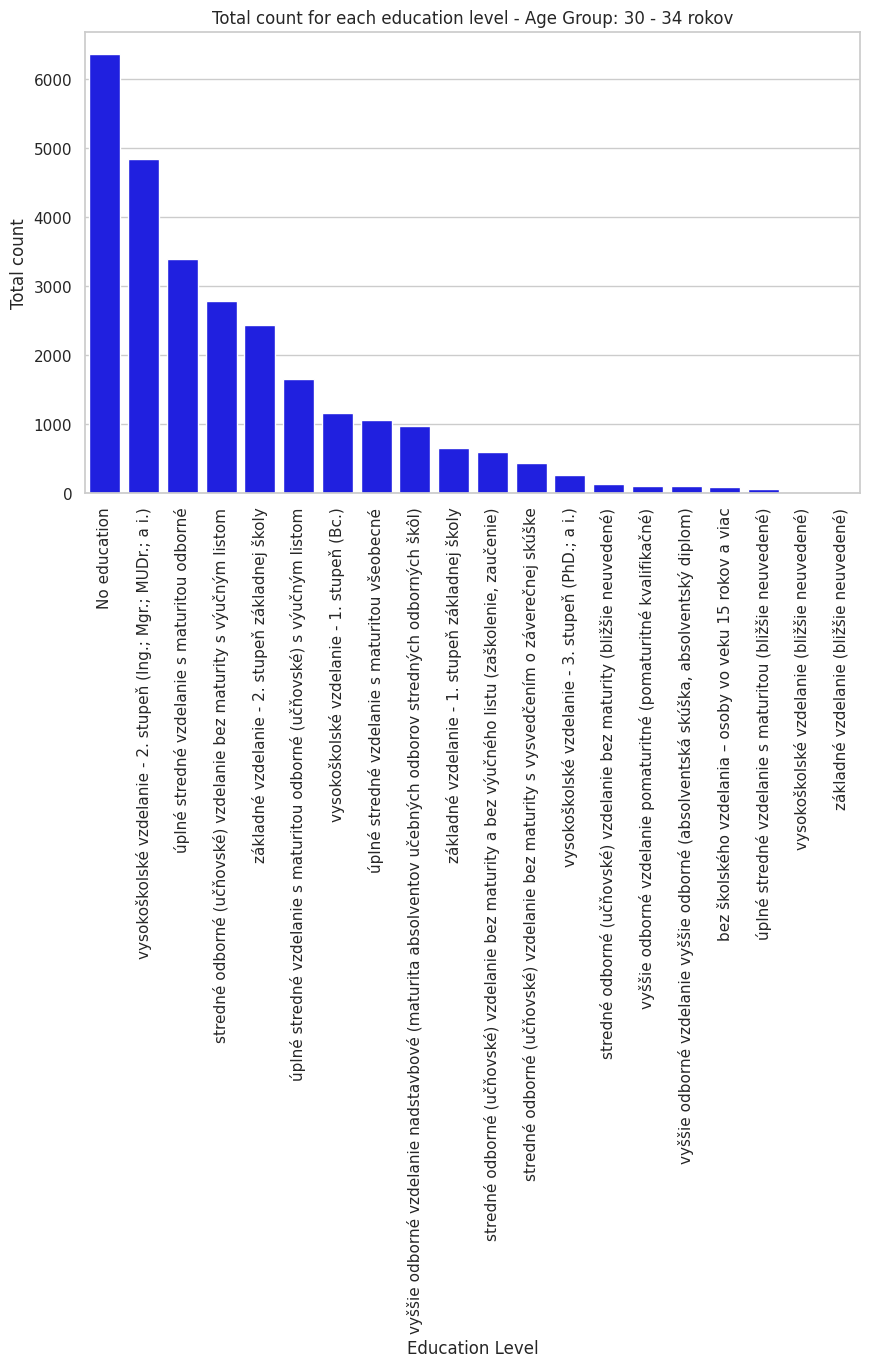

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



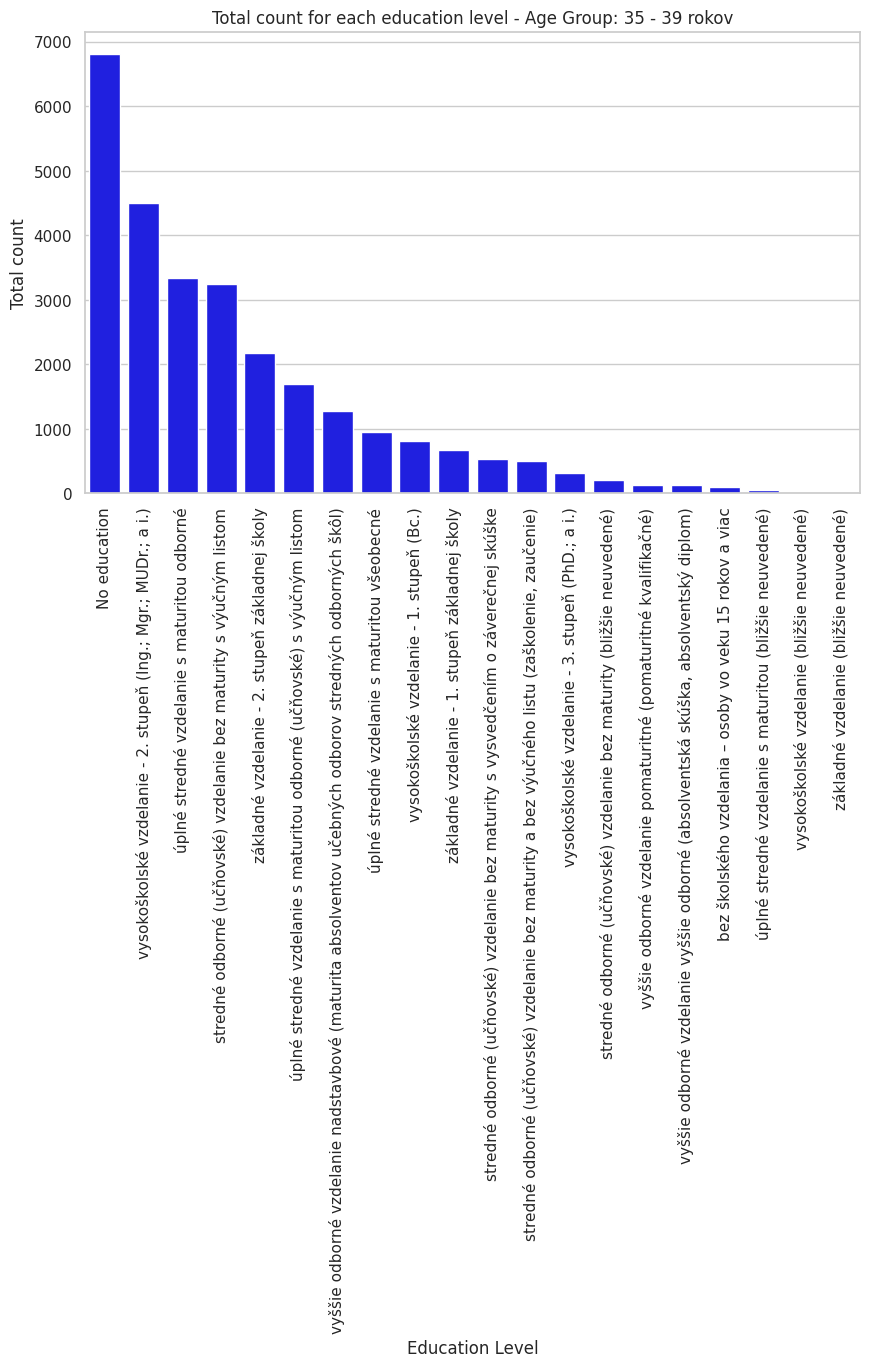

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



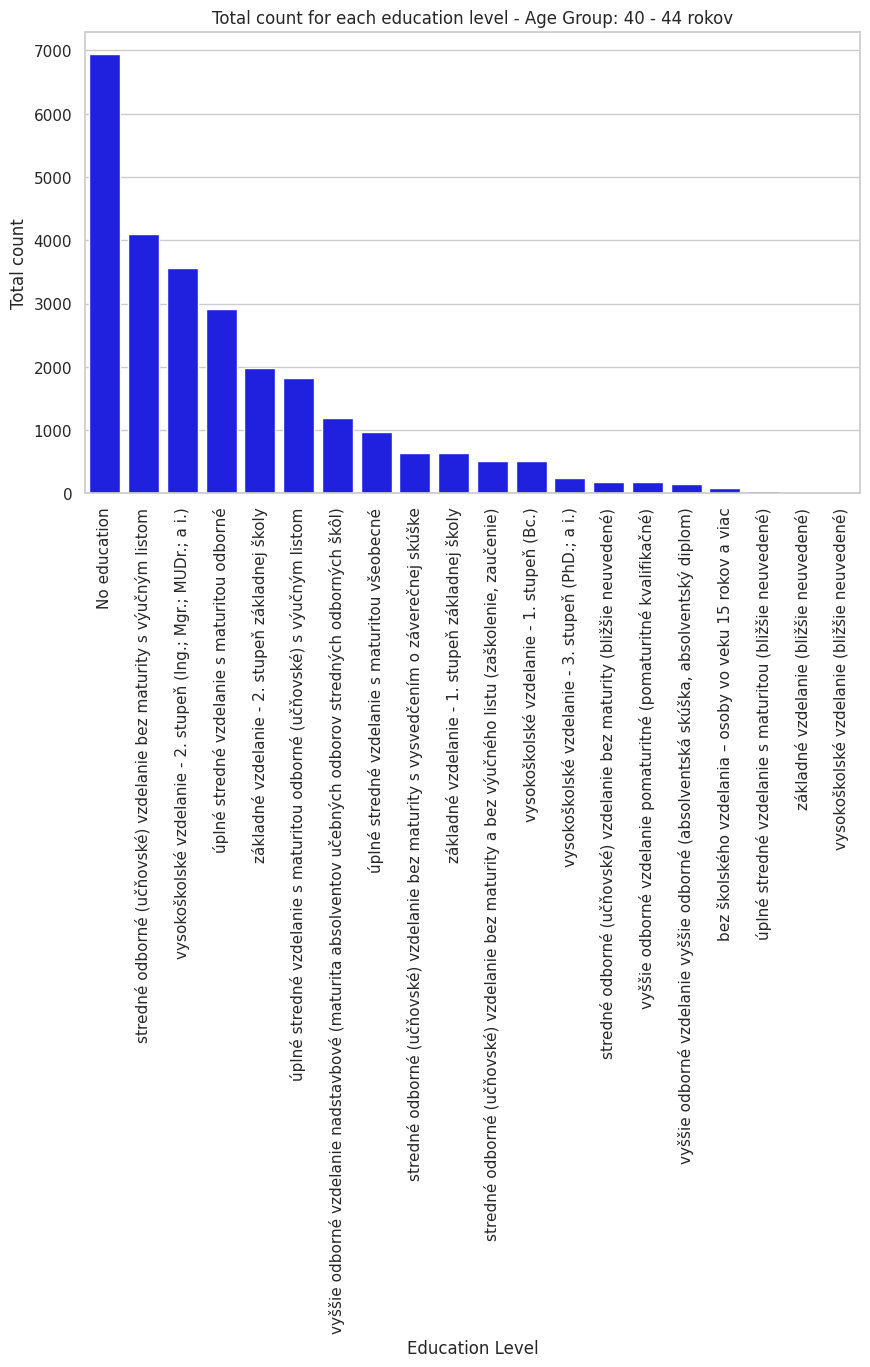

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



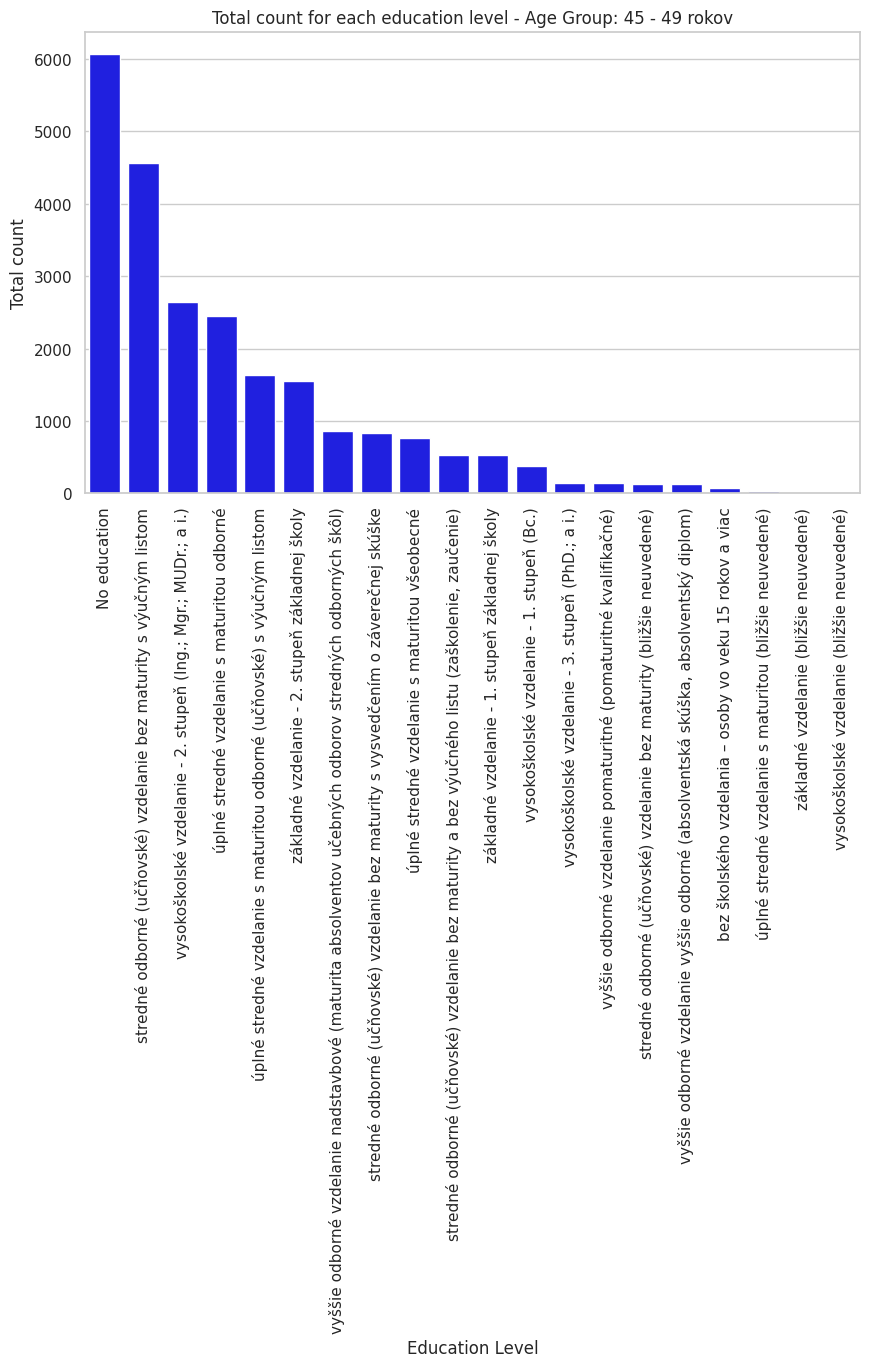

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



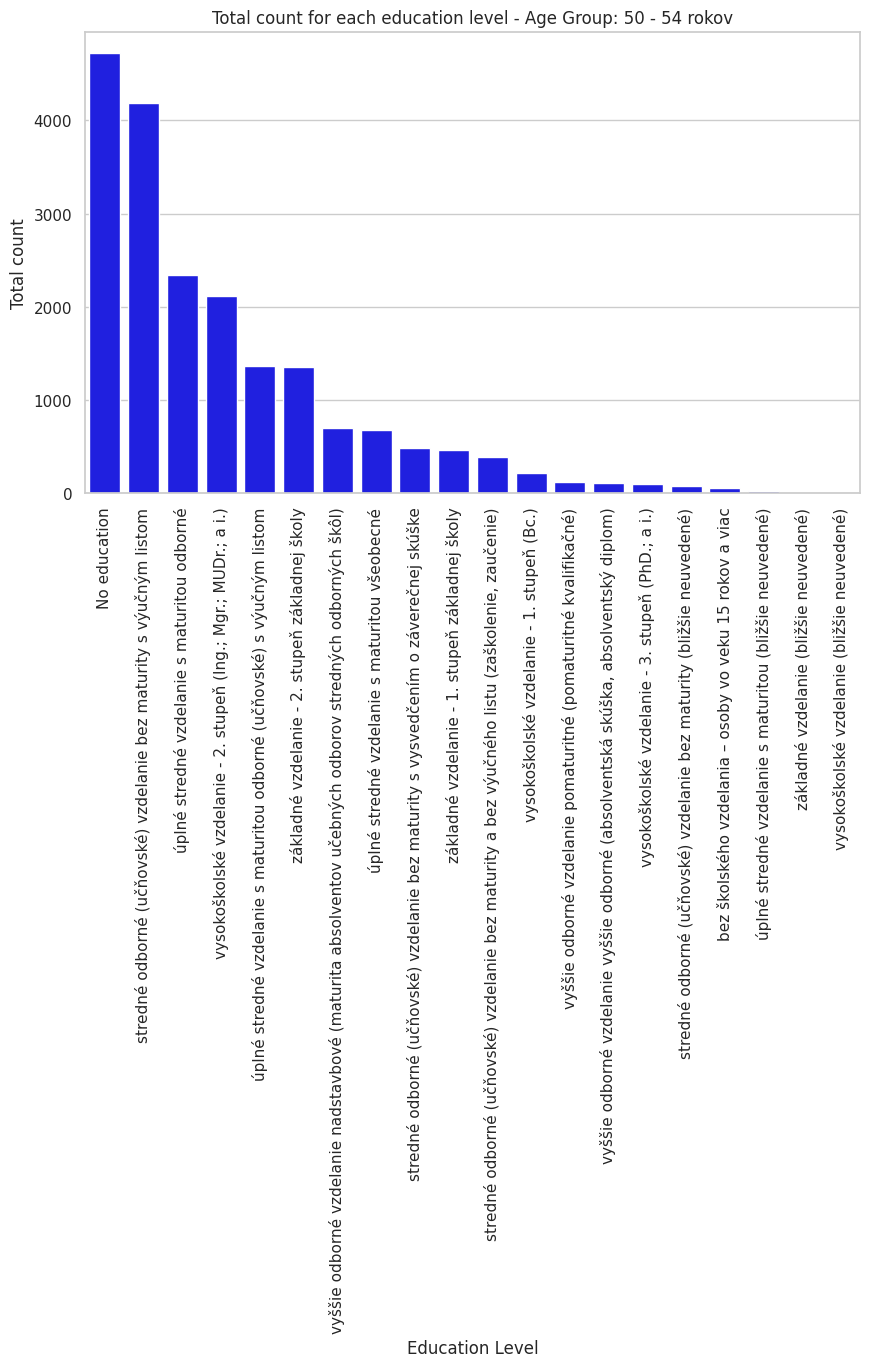

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



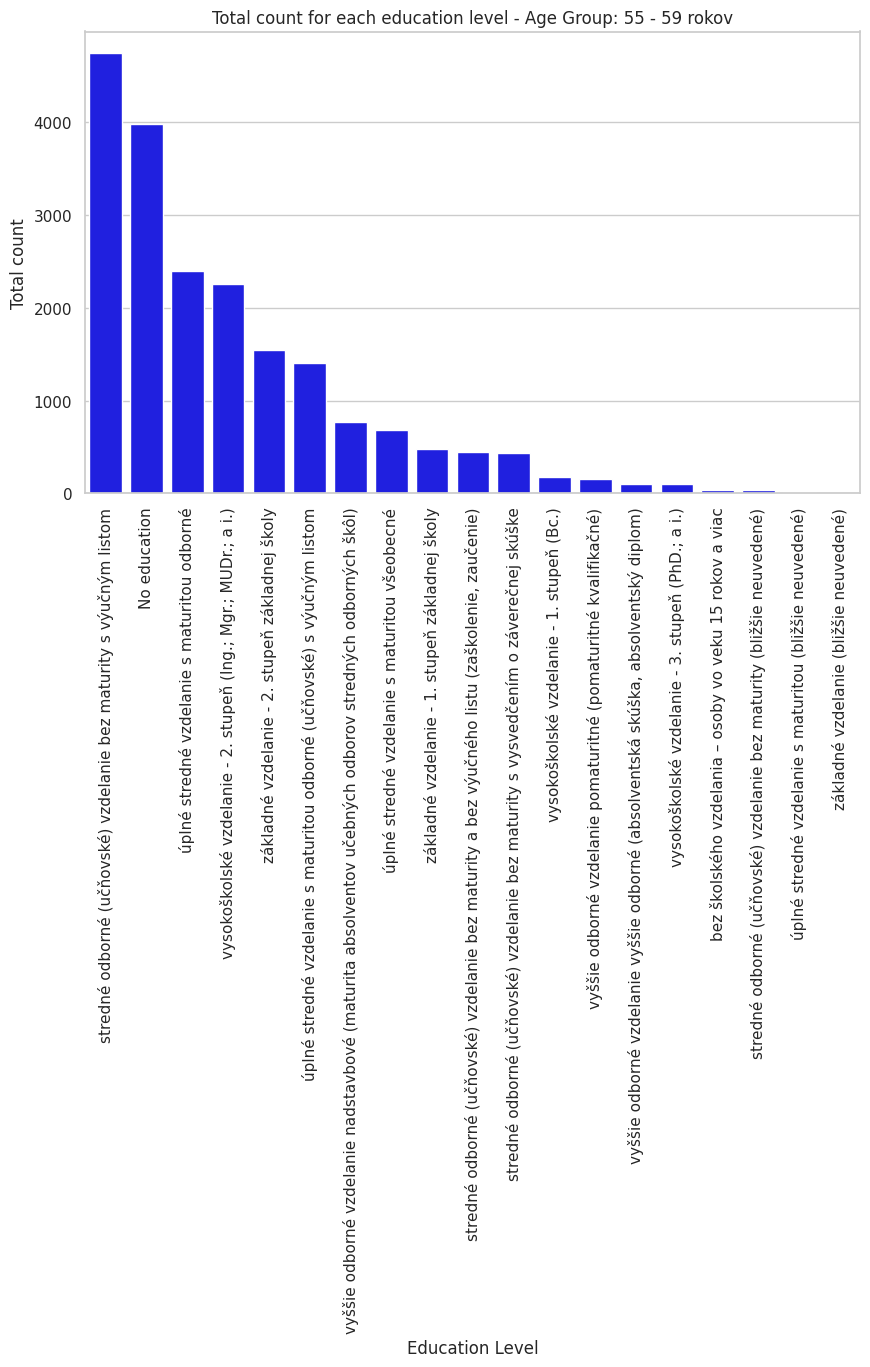

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



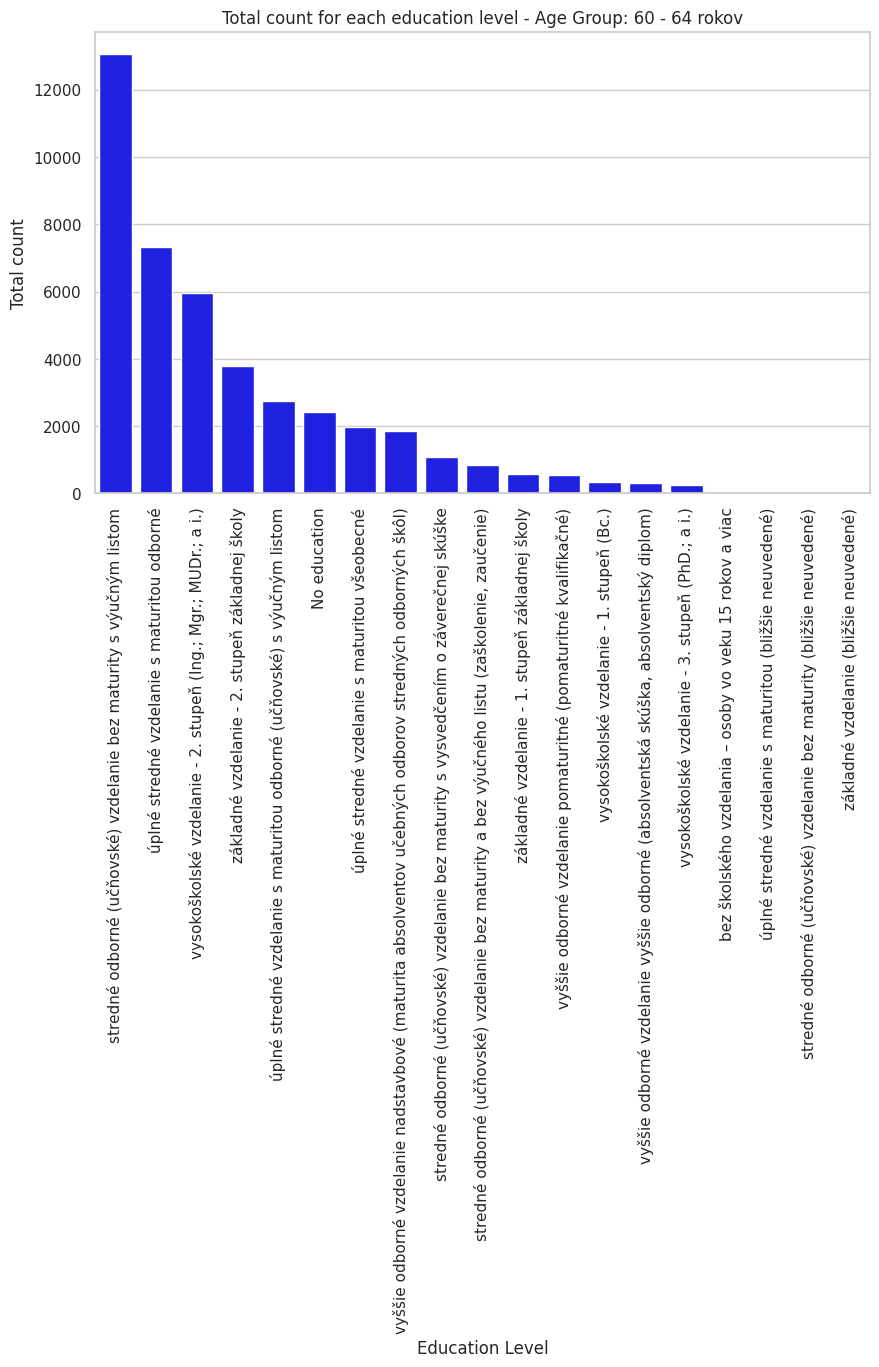

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



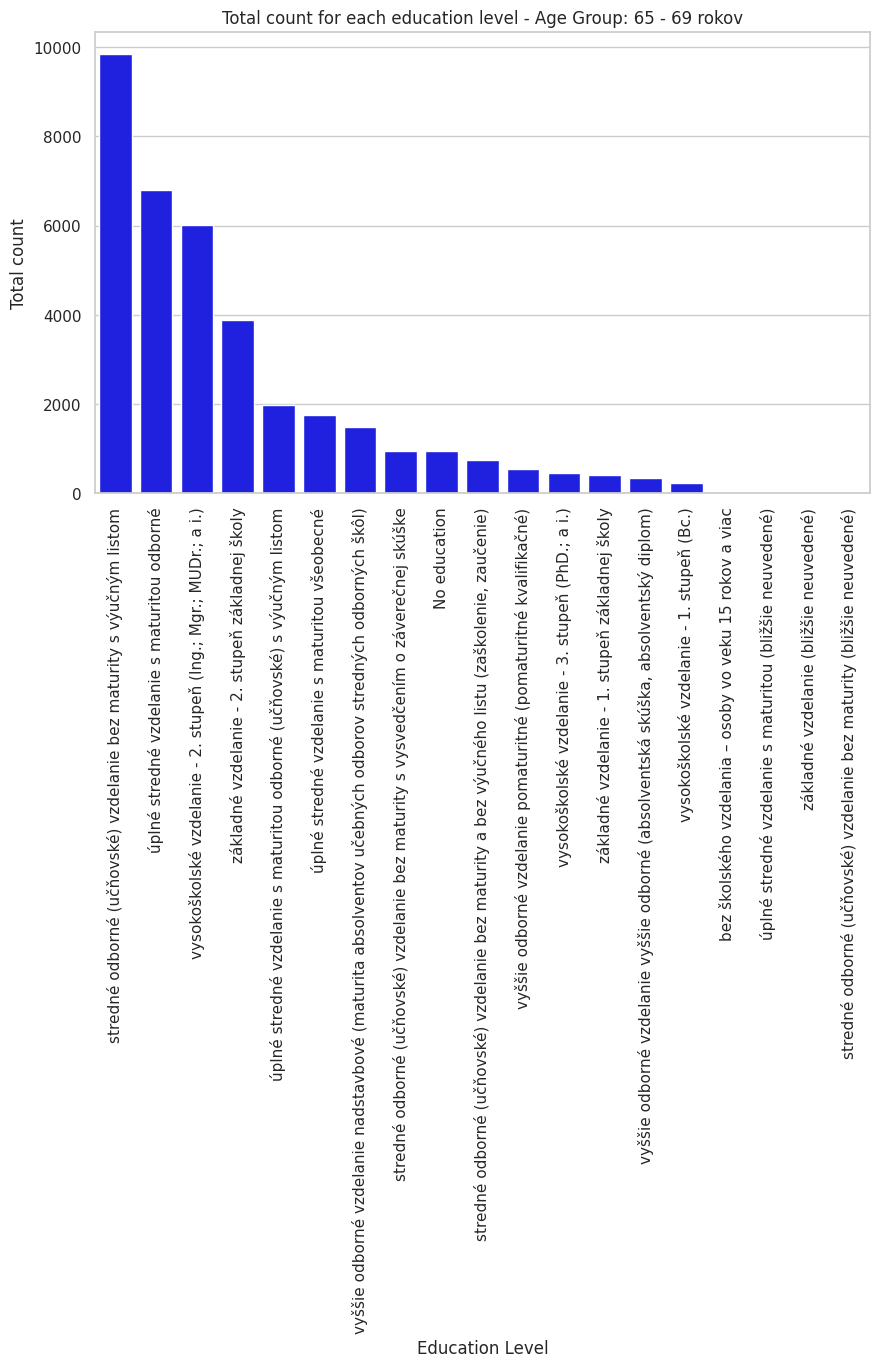

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



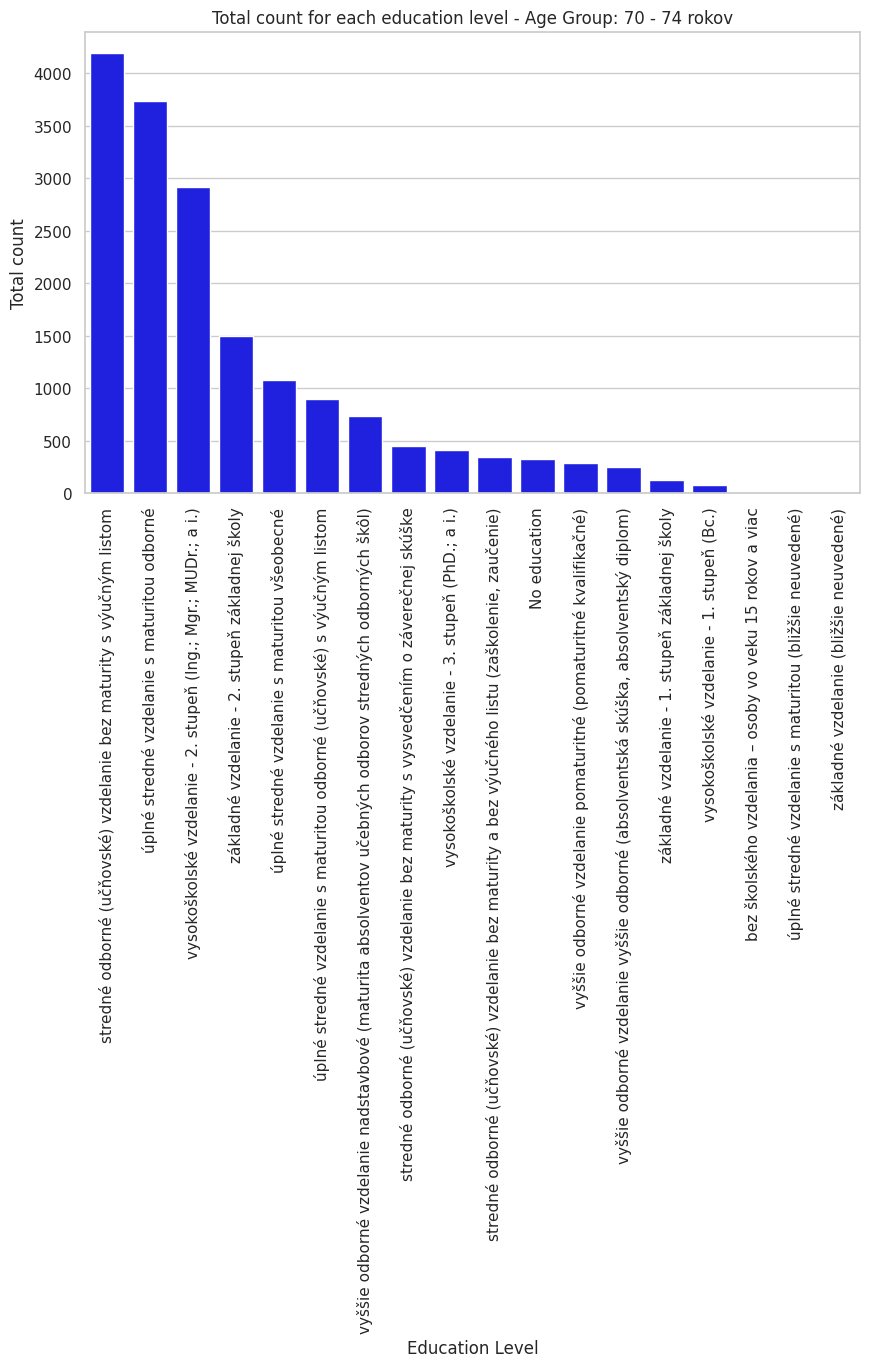

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



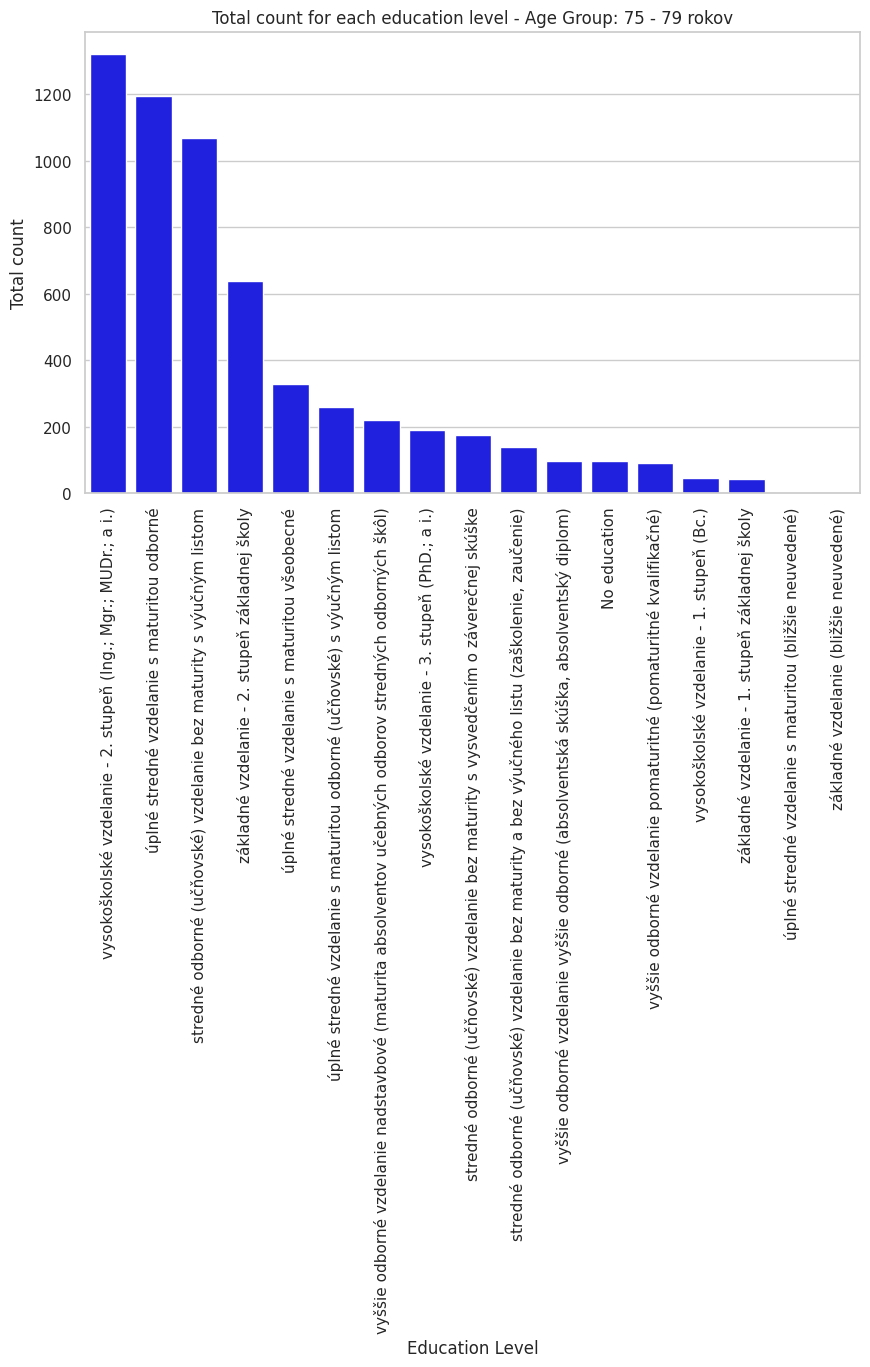

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



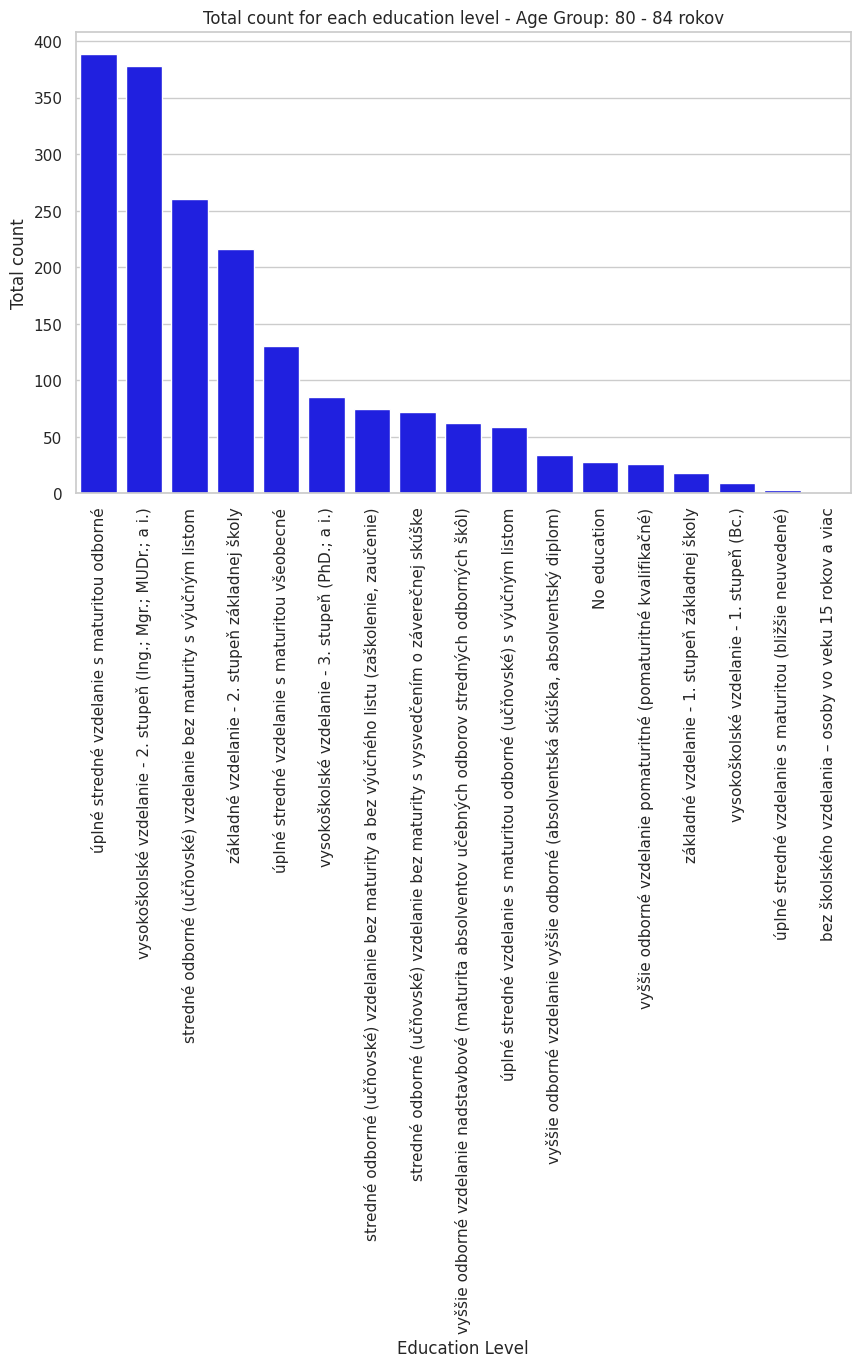

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



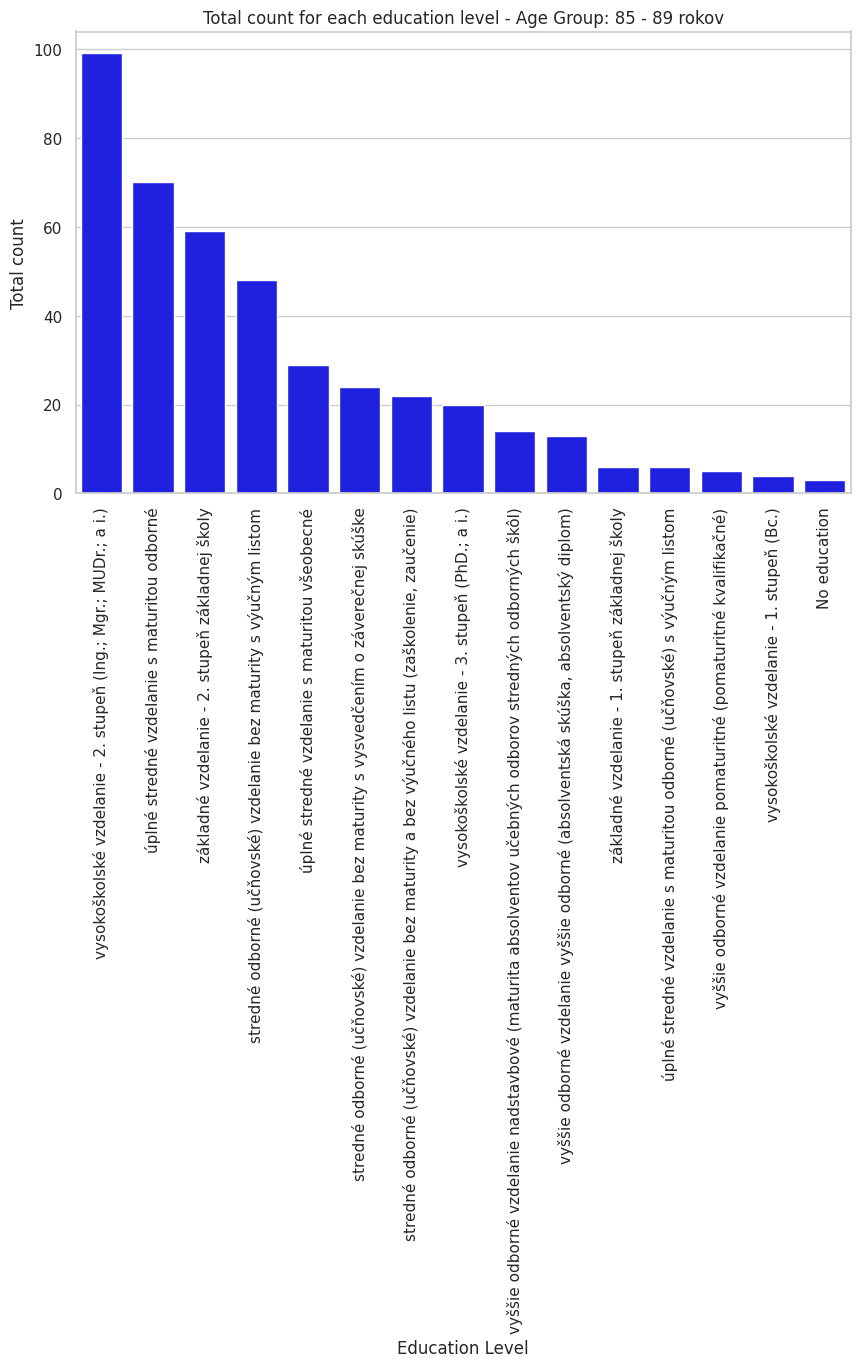

<ipython-input-48-1a02a86a2c55>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



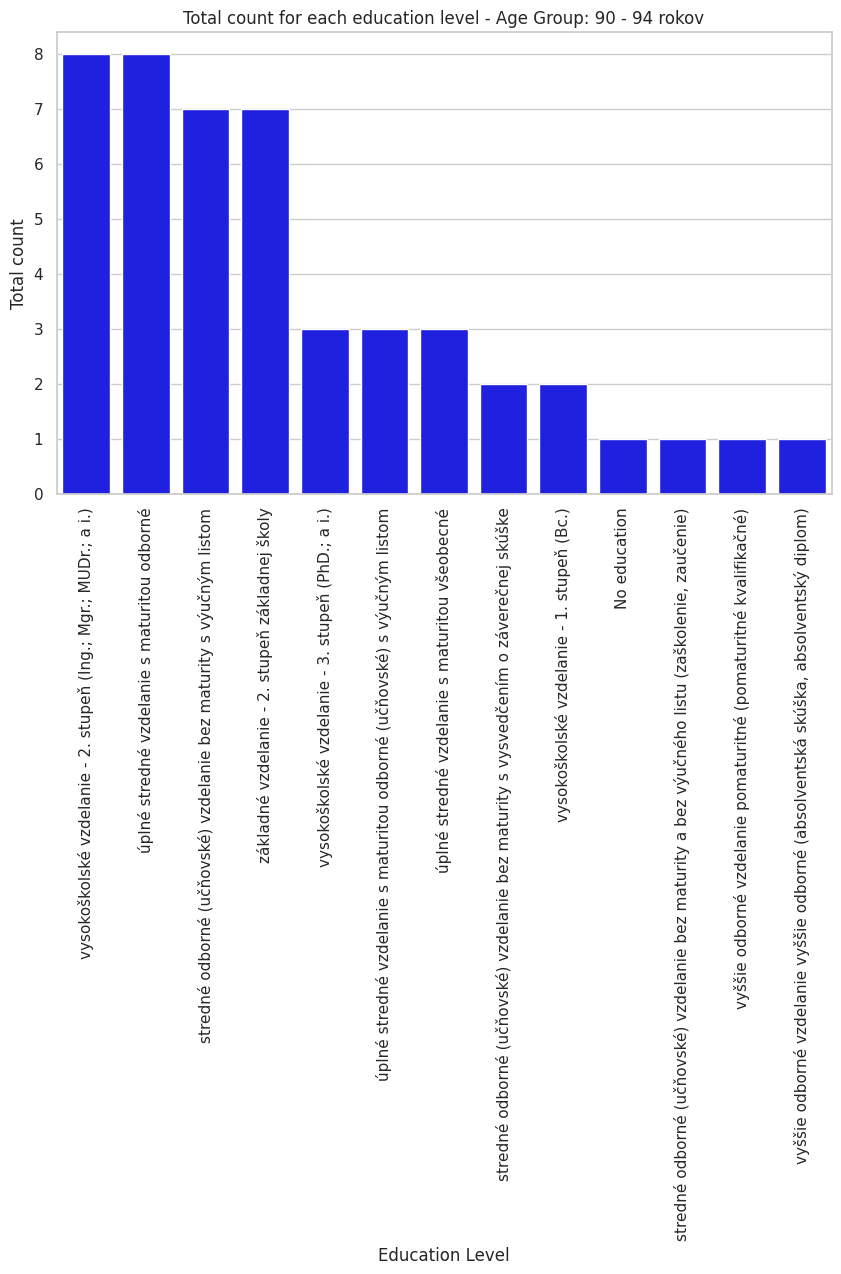

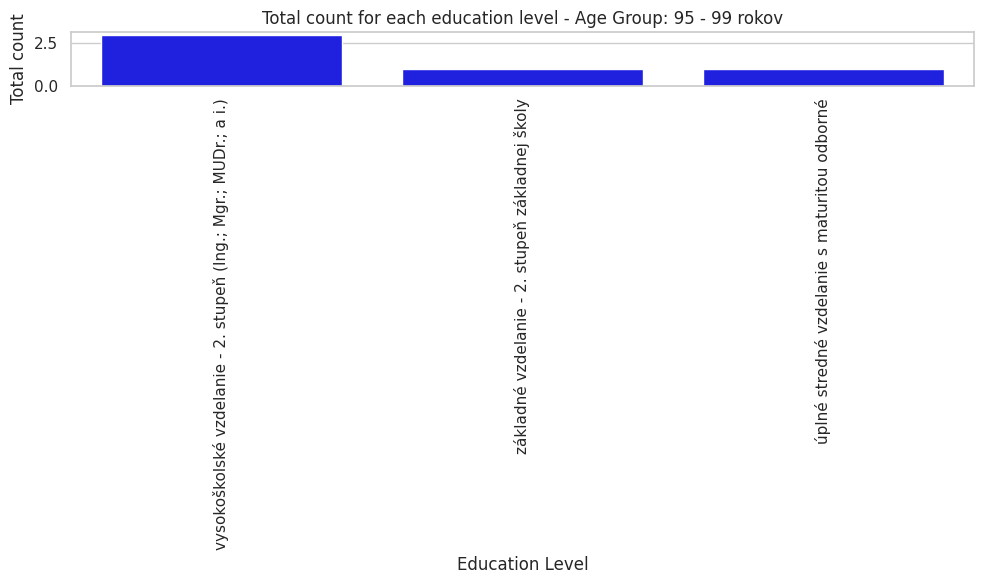

<ipython-input-48-1a02a86a2c55>:35: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



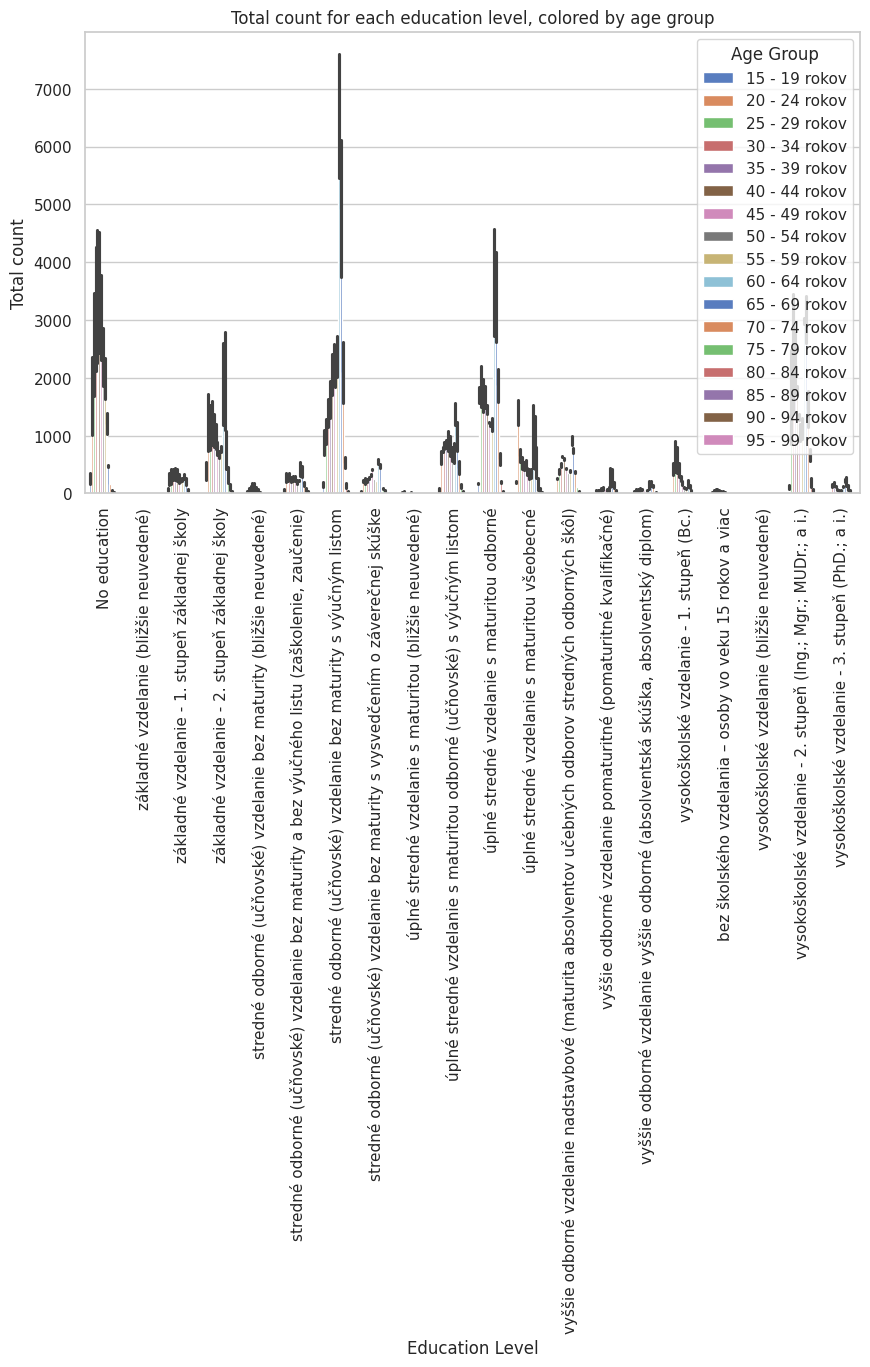

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


age_groups = education_age_groups['year_5_age_groups'].unique()

for age_group in age_groups:
    plt.figure(figsize=(10, 6))

    age_group_data = education_age_groups[education_age_groups['year_5_age_groups'] == age_group]

    education_unemployment = age_group_data.groupby('education')['count'].sum().sort_values(ascending=False)

    sns.barplot(x=education_unemployment.index, y=education_unemployment.values, color='blue')

    plt.xlabel('Education Level')
    plt.ylabel('Total count')
    plt.title(f'Total count for each education level - Age Group: {age_group}')

    plt.xticks(rotation=90)
    plt.tight_layout()

    plt.show()

plt.figure(figsize=(10, 6))

sns.barplot(x='education', y='count', hue='year_5_age_groups', data=education_age_groups, palette='muted')

plt.xlabel('Education Level')
plt.ylabel('Total count')
plt.title('Total count for each education level, colored by age group')

plt.xticks(rotation=90)
plt.legend(title="Age Group")
plt.tight_layout()

# plt.savefig('education_unemployment_age_groups_colored.png')

plt.show()
pass

In [53]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px


app = dash.Dash(__name__)

age_group_options = [{'label': age_group, 'value': age_group} for age_group in education_age_groups['year_5_age_groups'].unique()]

app.layout = html.Div([
    html.H1("Education vs. Unemployment by Age Group"),
    html.Label("Select Age Group(s)"),
    dcc.Dropdown(
        id='age-group-dropdown',
        options=age_group_options,
        value=[age_group_options[0]['value']],
        multi=True
    ),
    dcc.Checklist(
        id='include-no-education',
        options=[{'label': 'Include No education', 'value': 'no_education'}],
        value=['no_education']
    ),
    dcc.Graph(id='education-vs-unemployment-plot', style={'height': '800px'})
])

@app.callback(
    Output('education-vs-unemployment-plot', 'figure'),
    [Input('age-group-dropdown', 'value'),
     Input('include-no-education', 'value')]
)
def update_plot(selected_age_groups, include_no_education):
    filtered_data = education_age_groups[education_age_groups['year_5_age_groups'].isin(selected_age_groups)]
    if 'no_education' not in include_no_education:
        filtered_data = filtered_data[filtered_data['education'] != 'No education']

    aggregated_data = filtered_data.groupby(['education', 'year_5_age_groups'])['count'].sum().reset_index()

    sorted_education = aggregated_data.groupby('education')['count'].sum().sort_values(ascending=False).index

    fig = px.bar(aggregated_data, x='education', y='count', color='year_5_age_groups', barmode='group',
                 title='Education vs. Unemployment by Age Group', labels={'count': 'Total Count'},
                 category_orders={'education': sorted_education})
    return fig


if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


<IPython.core.display.Javascript object>